In [1]:
import scanpy as sc
import anndata
import MultiMAP
import numpy as np

In [2]:
adata_10x = sc.read_h5ad("/nfs/team283/aa16/data/Zika/zikaGlioblastomas_10X_SeuratObject.h5ad")

In [3]:
adata_SS = sc.read_h5ad("/nfs/team283/aa16/data/Zika/zikaGlioblastomas_SS_SeuratObject.h5ad")

In [4]:
adata_10x.X = adata_10x.raw.X

In [5]:
adata_SS.X = adata_SS.raw.X

In [6]:
adata_10x.obs['Celltype'] = adata_10x.obs['Celltype2']
adata_SS.obs['Celltype'] = adata_SS.obs['Celltype3']

In [7]:
adata_10x.var['mt'] = adata_10x.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata_SS.var['mt'] = adata_SS.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_10x, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_SS, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.normalize_total(adata_10x, target_sum=1e4)
sc.pp.normalize_total(adata_SS, target_sum=1e4)
sc.pp.log1p(adata_10x)
sc.pp.log1p(adata_SS)
sc.pp.highly_variable_genes(adata_10x, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(adata_SS, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_10x = adata_10x[:, adata_10x.var.highly_variable]
adata_SS = adata_SS[:, adata_SS.var.highly_variable]
adata_10x = sc.pp.regress_out(adata_10x, ['total_counts', 'pct_counts_mt'])
adata_SS = sc.pp.regress_out(adata_SS, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata_10x, max_value=10)
sc.pp.scale(adata_SS, max_value=10)
sc.tl.pca(adata_10x, svd_solver='arpack')
sc.tl.pca(adata_SS, svd_solver='arpack')

/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Technology' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZikaExposure' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Patient' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Celltype2' as categorical
/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'orig.ident' as categorical
Trying to set attribute `.obs` of view, copying.
... s

NameError: name 'data' is not defined

In [ ]:
adata_10x.X = adata_10x.raw.X
adata_SS.X = adata_SS.raw.X
sc.pp.log1p(adata_10x)
sc.pp.log1p(adata_SS)

In [7]:
MultiMAP.MultiMAP_Batch(adata_10x, 'Patient')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-0a1c015aaaf3>", line 1, in <module>
    MultiMAP.MultiMAP_Batch(adata_10x, 'Patient')
  File "/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/MultiMAP/__init__.py", line 235, in MultiMAP_Batch
    dimred_func(adatas[-1])
  File "/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/scanpy/preprocessing/_pca.py", line 188, in pca
    X_pca = pca_.fit_transform(X)
  File "/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py", line 376, in fit_transform
    U, S, V = self._fit(X)
  File "/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/sklearn/decomposition/_pca.py", line 425, in _fit
    return self._fit_truncated(X, n_components, self._fit_svd_solver)
  File "/nfs/users/nfs_a/aa16/.local/lib/python3.7

TypeError: object of type 'NoneType' has no len()

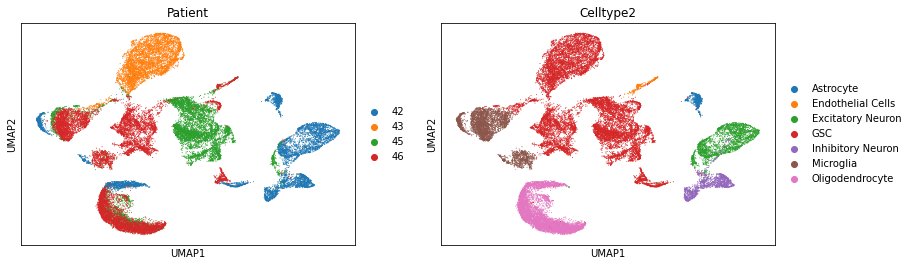

In [27]:
sc.pl.umap(adata_10x, color=['Patient','Celltype2'])

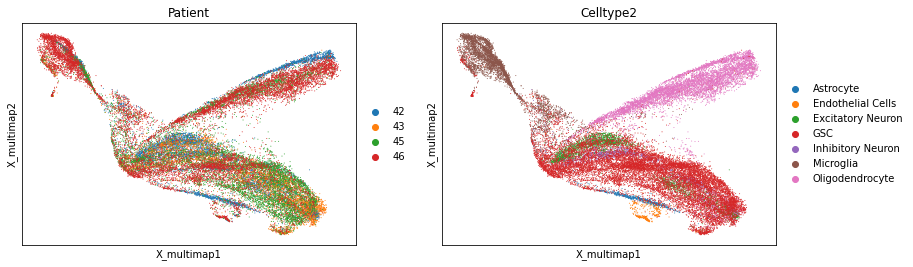

In [25]:
sc.pl.embedding(adata_10x, 'X_multimap', color=['Patient','Celltype2'])

In [28]:
MultiMAP.MultiMAP_Batch(adata_SS, 'Patient')

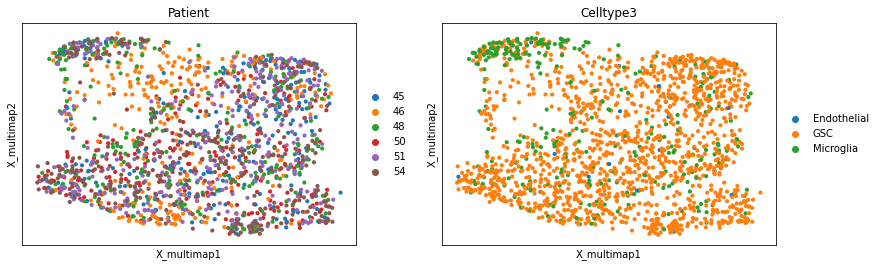

In [33]:
sc.pl.embedding(adata_SS, 'X_multimap', color=['Patient','Celltype3'])

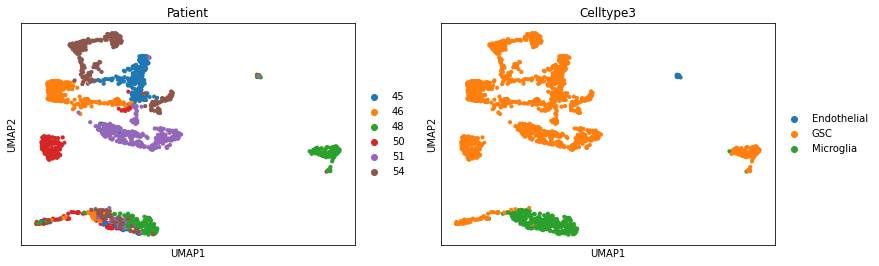

In [32]:
sc.pl.umap(adata_SS, color=['Patient','Celltype3'])

In [23]:
adata = MultiMAP.MultiMAP_Integration([adata_10x, adata_SS], ['X_pca', 'X_pca'])

TypeError: MultiMAP_Integration() missing 1 required positional argument: 'use_reps'

In [ ]:
sc.pl.embedding(adata, 'X_multimap', color=['Patient','Celltype'])